In [ ]:
import tensorflow as tf
import tensorflow as keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

x = Input(shape(2,)) # 입력층
y = Dense(units=1)(x) # 출력층

model = Model(x, y)

In [13]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D

(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))
x_train, x_test = x_train / 255 , x_test / 255

model = Sequential()
model.add(Conv2D(filters=16,kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32,kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64,kernel_size=(3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_split=0.2, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1755 - accuracy: 0.9459 - val_loss: 0.0669 - val_accuracy: 0.9796
Epoch 2/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0543 - accuracy: 0.9831 - val_loss: 0.0476 - val_accuracy: 0.9862
Epoch 3/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0401 - accuracy: 0.9875 - val_loss: 0.0643 - val_accuracy: 0.9807
Epoch 4/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0308 - accuracy: 0.9904 - val_loss: 0.0438 - val_accuracy: 0.9884
Epoch 5/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0246 - accuracy: 0.9921 - val_loss: 0.0373 - val_accuracy: 0.9901
Epoch 6/10
1500/1500 [==============================] - 31s 21ms/step - loss: 0.0210 - accuracy: 0.9934 - val_loss: 0.0468 - val_accuracy: 0.9870
Epoch 7/10
1500/1500 [==============================] - 27s 18ms/step - loss: 0.0183 - accuracy: 0.9938 - val_loss: 0.0332 - val_

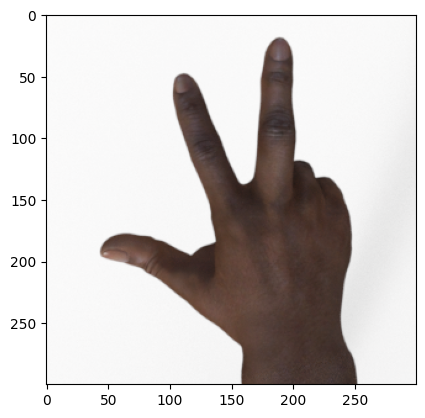

In [11]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers.experimental.preprocessing import RandomContrast

dataset, info = tfds.load('rock_paper_scissors', split='train', with_info=True, as_supervised=True)
image, label = next(iter(dataset))
plt.imshow(image)

DataAugmentation_RandomContrast = Sequential([RandomContrast(factor=0.3, seed=0)]) #증강??
img = DataAugmentation_RandomContrast(image)
plt.imshow(img/255)

In [1]:
import tensorflow as tfds
from tensorflow.keras.utils import get_file
import os
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

def get_data(fname, origin, extract):
    data_dir = get_file(fname=fname, origin=origin, extract=extract, cache_subdir='/content/drive/MyDrive/Colab Notebooks/data')
    data_dir = os.path.join(os.path.dirname(data_dir), 'cats_and_dogs_filtered')
    return data_dir

path_dir = get_data('train.zip', train_url, 'True')

train_dir = os.path.join(path_dir, 'train')
validation_dir = os.path.join(path_dir, 'validation')

train_ds = image_dataset_from_directory(directory=train_dir, batch_size=32, image_size=(256, 256), shuffle=True, seed=0)
validation_ds = image_dataset_from_directory(directory=validation_dir, batch_size=32, image_size=(256, 256), shuffle=True, seed=0)



Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [5]:
# 순환신경망 Recurrent Neural Network, RNN
import numpy as np
from tensorflow.keras.layers import SimpleRNN

input_array = np.random.random([2, 3, 4]).astype(np.float32)
simple_rnn = SimpleRNN(units=5, return_sequences=True, return_state=True)
timesteps_sequence_output, final_state  = simple_rnn(input_array)
output = simple_rnn(inputs=input_array)

output

[<tf.Tensor: shape=(2, 3, 5), dtype=float32, numpy=
 array([[[-0.07489417, -0.74566483,  0.45413932, -0.85186666,
           0.3052483 ],
         [-0.36926296,  0.06190059, -0.25674936, -0.42094442,
           0.23458755],
         [-0.6496741 , -0.5282736 ,  0.6590561 , -0.70608115,
           0.20225137]],
 
        [[ 0.09014906, -0.62996864,  0.5121684 , -0.6589838 ,
          -0.09306335],
         [-0.09022474,  0.53943527,  0.029438  , -0.3870436 ,
          -0.3110033 ],
         [-0.50291777, -0.5632112 ,  0.6627511 , -0.8809662 ,
          -0.12752044]]], dtype=float32)>,
 <tf.Tensor: shape=(2, 5), dtype=float32, numpy=
 array([[-0.6496741 , -0.5282736 ,  0.6590561 , -0.70608115,  0.20225137],
        [-0.50291777, -0.5632112 ,  0.6627511 , -0.8809662 , -0.12752044]],
       dtype=float32)>]

In [8]:
#LSTM Long Short Term Memory
import numpy as np
from tensorflow.keras.layers import LSTM

input_array = np.random.random([2, 3, 4]).astype(np.float32)

lstm = LSTM(4, return_sequences=True, return_state=True) # 전체 시퀸스 반환, 마지막 상태반환
timesteps_sequence_output, final_memory_state, final_carry_state = lstm(input_array)
timesteps_sequence_output

<tf.Tensor: shape=(2, 3, 4), dtype=float32, numpy=
array([[[ 0.05392307,  0.00798929,  0.02019707, -0.02269498],
        [ 0.15317969,  0.08045525, -0.05612741, -0.07699753],
        [ 0.09020052,  0.16295303,  0.01795349, -0.1189216 ]],

       [[-0.11189117,  0.1022351 ,  0.01182876, -0.06336101],
        [-0.07930841,  0.11143832, -0.0126118 , -0.08785944],
        [-0.06260633,  0.22459078,  0.04832295, -0.13408974]]],
      dtype=float32)>

In [16]:
#GRU Gated Recurrent Unit

import tensorflow as tfds
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets

(x_train, y_train), (x_test, y_test) = datasets.imdb.load_data(num_words=25000)

import plotly.express as px
review_len = [len(review) for review in x_train]
fig = px.histogram(review_len)
fig.show()

x_train = pad_sequences(sequences=x_train, maxlen=256)
x_test = pad_sequences(sequences=x_test, maxlen=256)